# Lab 3: Clustering

In [3]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date
import sklearn
pd.set_option("display.max_columns", None, "display.max_rows", None)
import missingno as msno

In [4]:
col_list = ["id", "price", "room_type", "bathrooms_text", "accommodates", "availability_30", "latitude", "longitude", "neighbourhood_group_cleansed", "number_of_reviews", "reviews_per_month"]

In [5]:
# load data
listings=pd.read_csv("https://raw.githubusercontent.com/rickfontenot/airbnb/main/airbnb_nyc_listings.csv?token=ARN5NNHQQO5DGH6T72FBV2DBGD342", usecols=col_list)

listings.head()

,id,neighbourhood_group_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,price,availability_30,number_of_reviews,reviews_per_month
0,2595,Manhattan,40.75356,-73.98559,Entire home/apt,1,1 bath,$150.00,6,48,0.34
1,3831,Brooklyn,40.68494,-73.95765,Entire home/apt,3,1 bath,$75.00,0,408,5.09
2,5121,Brooklyn,40.68535,-73.95512,Private room,2,NaN,$60.00,30,50,0.55
3,5136,Brooklyn,40.66265,-73.99454,Entire home/apt,4,1.5 baths,$275.00,7,1,0.01
4,5178,Manhattan,40.76457,-73.98317,Private room,2,1 bath,$61.00,3,485,3.63


In [6]:
# Check data info
listings.dtypes

id                                int64
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
room_type                        object
accommodates                      int64
bathrooms_text                   object
price                            object
availability_30                   int64
number_of_reviews                 int64
reviews_per_month               float64
dtype: object

# Cleaning Price

In [7]:
print(listings.price.dtypes) #initial type is object
print(listings.price.loc[[299]]) #original value "$2,500.00"
listings.price = listings.price.replace('[\$,]', '', regex=True).astype(float)
print(listings.price.dtypes) #transformed type is float64
print(listings.price.loc[[299]]) #new value is 2500.0

object
299    $2,500.00
Name: price, dtype: object
float64
299    2500.0
Name: price, dtype: float64


# Cleaning the bathroom

In [8]:
#convert nAn values to 'NA' for parsing, will change back to nAn after splitting
listings['bathrooms_text'] = listings['bathrooms_text'].astype(object).replace(np.nan, 'NA')

#Create translation dictionary since description formats are not consistent
transdict = {'1 bath': '1 private', 
             'NA': 'NA',
             '1.5 baths': '1.5 private',
             '1 shared bath': '1 shared', 
             '1 private bath': '1 private',
             'Shared half-bath': '0.5 shared',
             '2 baths': '2 private',
             '1.5 shared baths': '1.5 shared',
             '3 baths': '3 private',
             'Half-bath': '0.5 private',
             '2.5 baths': '2.5 private', 
             '2 shared baths': '2 shared',
             '0 baths' : '0 private',
             '4 baths':'4 private', 
             '0 shared baths': '0 shared',
             'Private half-bath': '0.5 private',  
             '4.5 baths' :'4.5 private', 
             '5.5 baths': '5.5 private' , 
             '2.5 shared baths': '2.5 shared',
             '3.5 baths': '3.5 private', 
             '15.5 baths': '15.5 private', 
             '5 baths': '5 private', 
             '3 shared baths': '3 shared', 
             '4 shared baths': '4 shared',
             '6 baths': '6 private', 
             '3.5 shared baths': '3.5 private', 
             '6 shared baths' : '6 shared',
             '6.5 shared baths': '6.5 shared', 
             '4.5 shared baths' :'4.5 private',
             '5.5 shared baths' : '5.5 private', 
             '7.5 baths': '7.5 private', 
             '5 shared baths': '5 shared',
             '6.5 baths': '6.5 private', 
             '8 baths': '8 private', 
             '7 shared baths':'7 shared', 
             '7 baths': '7 private', 
             '10 baths': '10 private'}

#use trandict to iterate over bathrooms_text column
listings['bathrooms_text'] = [transdict[letter] for letter in listings['bathrooms_text']]

#use str.split to create two new columns 'num_baths' and 'bath_type'
listings[['num_baths','bath_type']] = listings['bathrooms_text'].str.split(' ', 1, expand = True)

#For num_baths convert 'NA' values back to nan and convert type to float
listings['num_baths'] = listings['num_baths'].astype(object).replace( 'NA',np.nan)
listings['num_baths'] = listings['num_baths'].astype(np.float16)

#For bath type convert 'NA' values back to nan and convert type to category
listings.bath_type.fillna(value=np.nan, inplace=True)
listings['bath_type'] = listings['bath_type'].astype('category')

# Drop bathroom_text

In [9]:
#Confirm conversions for bathroom text
print(listings.num_baths.dtypes) #transformed type is float16
print(listings.num_baths.unique())
print(listings.bath_type.dtypes) #transformed type is category
print(listings.bath_type.unique()) 

#Drop original bathrooms_text column now that replaced by two new variables
listings.drop('bathrooms_text', axis=1, inplace=True)

float16
[ 1.   nan  1.5  0.5  2.   3.   2.5  0.   4.   4.5  5.5  3.5 15.5  5.
  6.   6.5  7.5  8.   7.  10. ]
category
['private', NaN, 'shared']
Categories (2, object): ['private', 'shared']


# Data type dict

In [10]:
convert_dict = {
'neighbourhood_group_cleansed': 'category',
'room_type': 'category',
'accommodates': 'Int16',
'price': 'float64',
'availability_30': 'Int16',
'num_baths': 'float64',
'bath_type': 'category',
"number_of_reviews":"int16", 
"reviews_per_month": "float64"
               }
  
listings = listings.astype(convert_dict, errors='ignore')
print(listings.dtypes)

id                                 int64
neighbourhood_group_cleansed    category
latitude                         float64
longitude                        float64
room_type                       category
accommodates                       Int16
price                            float64
availability_30                    Int16
number_of_reviews                  int16
reviews_per_month                float64
num_baths                        float64
bath_type                       category
dtype: object


# Check Missing Values

In [11]:
listings.isna().sum()

id                                 0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
room_type                          0
accommodates                       0
price                              0
availability_30                    0
number_of_reviews                  0
reviews_per_month               9415
num_baths                        109
bath_type                        109
dtype: int64

# Drop Missing Values and Duplicate rows

In [12]:
print("Dataframe Size before dropping NA: ",listings.shape)
listings.dropna(inplace= True)
print("Dataframe Size after dropping NA: ",listings.shape)

print(listings.isna().sum())

# Check for duplicate rows
print('Duplicate rows: ',listings.duplicated(keep='first').sum())

Dataframe Size before dropping NA:  (36724, 12)
Dataframe Size after dropping NA:  (27243, 12)
id                              0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
room_type                       0
accommodates                    0
price                           0
availability_30                 0
number_of_reviews               0
reviews_per_month               0
num_baths                       0
bath_type                       0
dtype: int64
Duplicate rows:  0


In [13]:
Categoricals_to_convert = ['neighbourhood_group_cleansed','room_type','bath_type']

# using pd get dummies for the category columns we are keeping
dummies = pd.get_dummies(listings[Categoricals_to_convert],drop_first=True)

#dropping original columns
listings_df = listings.drop(Categoricals_to_convert,axis=1)

#concating dummies to the data frame
listings_df = pd.concat([listings_df,dummies],axis=1)


listings_df.head()

,id,latitude,longitude,accommodates,price,availability_30,number_of_reviews,reviews_per_month,num_baths,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Hotel room,room_type_Private room,room_type_Shared room,bath_type_shared
0,2595,40.75356,-73.98559,1,150.0,6,48,0.34,1.0,0,1,0,0,0,0,0,0
1,3831,40.68494,-73.95765,3,75.0,0,408,5.09,1.0,1,0,0,0,0,0,0,0
3,5136,40.66265,-73.99454,4,275.0,7,1,0.01,1.5,1,0,0,0,0,0,0,0
4,5178,40.76457,-73.98317,2,61.0,3,485,3.63,1.0,0,1,0,0,0,1,0,0
5,5203,40.80380,-73.96751,1,75.0,0,118,0.90,1.0,0,1,0,0,0,1,0,1


In [14]:
#Split Modeling and Validation Datasets
from sklearn.model_selection import train_test_split

listings_cleaned = listings_df[(listings_df.price >= 14) & (listings_df.price < 5000)]
listings_cleaned['price_log'] = np.log10(listings_cleaned['price'])

listings_modeling, listings_validation = train_test_split(listings_cleaned, test_size=0.1, random_state=42)

print("Size of modeling set (to be CV split): ",listings_modeling.shape)
print("Size of hold back validation set: ",listings_validation.shape)

Size of modeling set (to be CV split):  (24499, 18)
Size of hold back validation set:  (2723, 18)


C:\Users\OaklandHillsMansion\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
from sklearn.preprocessing import StandardScaler

Lat = listings_modeling.latitude
Long = listings_modeling.longitude

LatLong = np.column_stack((Lat, Long))

LatLong.shape



(24499, 2)

In [30]:
Lat_val = listings_validation.latitude
Long_val = listings_validation.longitude

LatLong_val = np.column_stack((Lat_val, Long_val))

LatLong_val.shape

(2723, 2)

# Train and Adjust Params.:
## Spectral Clustering

Say what spectral clustering is...
Latitude and longitude were the two variables choosen for spectral clustering.
The affinity type was set to 'nearest_neighbors' and was not changed during this section.
The clusters and neighbor parameters were adjusted for the model using values that ranged from x to  y.
A spectral model was trained and fit for each clusters and neighbor value combonation.
The silhouette socre for each model was collected in a dataframe, along with the clusters and neighbor values.


nneighbors 10
nclusters 35


C:\Users\OaklandHillsMansion\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Text(0.5, 1.0, 'Elbow Method')

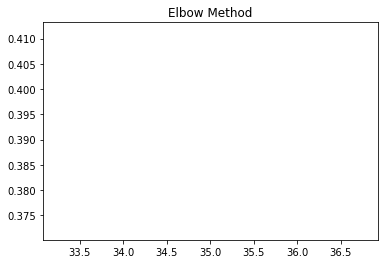

In [35]:
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import silhouette_score

spc_LatLong = listings_modeling[['latitude','longitude']]

cluster_range = range(35,45,10)
neighbors_range = range(10,20,10)

# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()

nearest_neighbors_silhouette = []
precomp_silhouette = []

for nneighbors in neighbors_range:
    print('nneighbors', nneighbors)

    for nclusters in cluster_range:
        print('nclusters',nclusters)
        # Generating Sprectral clusters
        spc = SpectralClustering(n_neighbors=nneighbors,
                                n_clusters=nclusters, 
                                affinity = 'nearest_neighbors', n_jobs=-1)
                                
        spc.fit_predict(spc_LatLong)
        sil_score=silhouette_score(spc_LatLong, spc.labels_)
        
        silhouette_scores_data=silhouette_scores_data.append(
            pd.DataFrame(data=[[sil_score,nneighbors,nclusters]], 
                columns=["score", "n_neighbors", "n_clusters"]))

# plt.figure(1)
# plt.subplot(211)
# plt.plot(cluster_range, precomp_silhouette)
# plt.title('Elbow Method')

# plt.ylabel('Silhouette')
# plt.subplot(212)

# plt.xlabel('Clusters')
# plt.ylabel('Silhouette')
# plt.plot(cluster_range, nearest_neighbors_silhouette)


# plt.show()


# Evaluate and Compare

## Silhoutte graph:
The silhouette graph shows the silhouette scores for all models that were fitted vs the number of clusters.
The optimal number of cluster, according to the silhouette score, is indicated where the sihloutte score is highest,or at the peak of the graph.
Silhouette measues how similar a point is to it's cluster vs other clusters.
Why did we choose this over the elbow???
Compared to all the models fitted the optimal value for this dataset, according to the silhouette score, is 10 neighbors and 35 clusters.

In [ ]:
plt.figure()
plt.plot('n_clusters','score', data=silhouette_scores_data)
plt.title('Silhoutte Method')

## Heatmap:
The heatmap depicts areas where silhouette score is high and low, on a coordinate plain where the x-y coords are num clusters vs num neighbors.
Make comment on what the heatmap is telling you........


In [ ]:
silhouette_scores_data.sort_values(by=['score'], ascending=False)

heatmap_data = pd.pivot_table(silhouette_scores_data, values='score', 
                     index=['n_neighbors'], 
                     columns='n_clusters')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu")

## Histo plot for clusters:
Checking the distribution of points per label.


nearest neigh sihlo: 0.391678692055989
nearest neigh cluster: 35.0
num neighbors: 10.0


C:\Users\OaklandHillsMansion\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\OaklandHillsMansion\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\OaklandHillsMansion\Python\Python37\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\OaklandHillsMansion\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: SettingW

Text(0.5, 1.0, 'Nearest Neighbors Clusters')

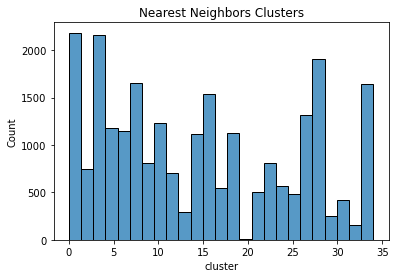

In [39]:
# Nearest Neighbosr Tuned Model
nn_max_sihlo_idx = silhouette_scores_data['score'].idxmax() # get index of the max sihlo score
nn_sihlo_val = silhouette_scores_data.iloc[nn_max_sihlo_idx]['score']
nn_cluster = silhouette_scores_data.iloc[nn_max_sihlo_idx]['n_clusters'] # get cluster value at index of the max sihlo score
nn_neighbors = silhouette_scores_data.iloc[nn_max_sihlo_idx]['n_neighbors']

print("nearest neigh sihlo:", nn_sihlo_val)
print("nearest neigh cluster:", nn_cluster)
print("num neighbors:", nn_neighbors)

title = "Nearest Neighbors Clusters"

# Create hypertuned Sprectral cluster model
nearest_neighbors_spc = SpectralClustering(n_neighbors=int(nn_neighbors),
                        n_clusters=int(nn_cluster), 
                        affinity = 'nearest_neighbors', n_jobs=-1)

label = nearest_neighbors_spc.fit_predict(LatLong)
label_val = nearest_neighbors_spc.fit_predict(LatLong_val)
listings_modeling['cluster'] = label
listings_validation['cluster'] = label_val

sns.histplot(data=listings_modeling, x="cluster").set_title(title)

nearest neigh sihlo: 0.3850710826277839
nearest neigh cluster: 45
precomp sihlo: 0.378116561960329
precomp cluster: 35


C:\Users\TripleDoubleNoAssits\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\TripleDoubleNoAssits\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\TRIPLE~1\AppData\Local\Temp/ipykernel_13732/1764660273.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_modeling['cluster'] = label
C:\Users\TRIPLE~1\AppData\Lo

Text(0.5, 1.0, 'Nearest Neighbors Clusters')

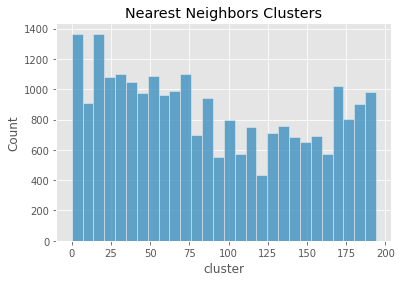

In [168]:

# # Nearest Neighbosr Tuned Model
# nn_max_sihlo_idx = np.argmax(nearest_neighbors_silhouette) # get index of the max sihlo score
# nn_sihlo_val = nearest_neighbors_silhouette[nn_max_sihlo_idx]
# nn_cluster = cluster_range[nn_max_sihlo_idx] # get cluster value at index of the max sihlo score


# # # Pre Comp Tuned Model
# pc_max_sihlo_idx = np.argmax(precomp_silhouette) # get index of the max sihlo score
# pc_sihlo_val = precomp_silhouette[pc_max_sihlo_idx]
# pc_cluster = cluster_range[pc_max_sihlo_idx] # get cluster value at index of the max sihlo score

# print("nearest neigh sihlo:", nn_sihlo_val)
# print("nearest neigh cluster:", nn_cluster)
# print("num neighbors:", nn_neighbors)

# print("precomp sihlo:", pc_sihlo_val)
# print("precomp cluster:", pc_cluster)

# if nn_sihlo_val>pc_sihlo_val:
#     title = "Nearest Neighbors Clusters"
#     nearest_neighbors_spc = SpectralClustering(n_clusters = nn_cluster, affinity = "nearest_neighbors")

#     label = nearest_neighbors_spc.fit_predict(LatLong)
#     label_val = nearest_neighbors_spc.fit_predict(LatLong_val)
#     listings_modeling['cluster'] = label
#     listings_validation['cluster'] = label_val

# else:
#     title = "Precomputed Clusters"
#     precomputed_spc = SpectralClustering(n_clusters = pc_cluster, affinity = "precomputed")
#     xknn_val = kneighbors_graph(LatLong_val, 10) # additional connectivity informationlabels = spc.fit_predict(LatLong)

#     label = precomputed_spc.fit_predict(LatLong)
#     label_val = precomputed_spc.fit_predict(xknn_val)
#     listings_modeling['cluster'] = label
#     listings_validation['cluster'] = label_val


# sns.histplot(data=listings_modeling, x="cluster").set_title(title)

# Visualize Results:
## Geopandas Graph

In [169]:
# # Modeling Dataset
# import geopandas as gpd
# from geopandas import GeoSeries
# from shapely.geometry import Point

# kmeans_LatLong = listings_modeling[['latitude','longitude']]

# # kmeans_fit = KMeans(init='k-means++', n_clusters=75, n_init=1, n_jobs=-1).fit(LatLong)
# kmeans_LatLong['cluster'] = label

# geo_df = gpd.GeoDataFrame(kmeans_LatLong.drop(['longitude', 'latitude'], axis=1),
#                            crs={'init': 'epsg:4326'},
#                            geometry=[Point(xy) for xy in zip(kmeans_LatLong.longitude, kmeans_LatLong.latitude)])
      
# # Set figure size
# fig, ax = plt.subplots(figsize=(10,10))
# ax.set_aspect('equal')
    
# # Import NYC Neighborhood Shape Files
# nyc_full = gpd.read_file('Working/Shapefiles/neighborhoods_nyc.shp')
# nyc_full.plot(ax=ax, edgecolor='darkgrey', color='lightgrey', zorder=1)
    
# # Plot coordinates from geo_df on top of NYC map
# geo_df.plot(ax=ax, column='cluster', cmap='tab20', alpha = 0.8, zorder=1, s=2)
# plt.title('Kmeans Clustering for Modeling Dataset')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

In [40]:
#Standard scale the data
from sklearn.preprocessing import StandardScaler

#Create X and Y for modeling
X_price = listings_modeling.drop(['id','price','price_log','latitude','longitude'],axis=1) #droping rating_max
Y_price_log = listings_modeling['price_log']

#Create new X and Y for validation
X_price_valid = listings_validation.drop(['id','price','price_log','latitude','longitude'],axis=1) #droping rating_max
Y_price_log_valid = listings_validation['price_log']

std = StandardScaler()

std.fit(X_price.values) # only std.fit on train set
X_price_std = std.transform(X_price.values)
X_price_valid_std = std.transform(X_price_valid.values)

In [41]:
from sklearn.model_selection import KFold

cv_price = KFold(n_splits=10, shuffle=False)

from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error, r2_score

def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)
r2_scorer = make_scorer(score_func=r2_score, greater_is_better=True)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer,
                'R2': r2_scorer
               } 

In [42]:
#Create function for regression models
from sklearn.model_selection import cross_validate

def EvaluateRegressionEstimator(modelNme, regEstimator, X, y, x_valid, y_valid, cv):
    
    print('Parameterization of the best estimator:',regEstimator,'\n')

    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv, return_train_score=True)

    yhat = regEstimator.predict(x_valid)

    #cross val score sign-flips the outputs of MAE
    # https://github.com/scikit-learn/scikit-learn/issues/2439
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_MAPE'] = scores['test_MAPE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1

    #print mean MAE for all folds 
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg:.5}"
    print(print_str.format(maeAvg=maeAvg))

    #print mean test_MAPE for all folds
    mape_avg = scores['test_MAPE'].mean()
    print_str = "The average MAE percentage (MAPE) for all cv folds is: \t {mape_avg:.5}"
    print(print_str.format(mape_avg=mape_avg))

    #print mean RMSE for all folds 
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is: \t\t\t {RMSEavg:.5}"
    print(print_str.format(RMSEavg=RMSEavg))

    #print R2 for all folds 
    R2avg = scores['test_R2'].mean()
    print_str = "The average R2 for all cv folds is: \t\t\t {R2avg:.5}"
    print(print_str.format(R2avg=R2avg))
    print('---------------------------------------------------------------------')

    model_stat = pd.DataFrame()
    model_stat['Model_name'] = [str(modelNme)]
    model_stat['MAE_model'] = scores['test_MAE'].mean()
    model_stat['MAPE_model'] = scores['test_MAPE'].mean()
    model_stat['RMSE_model'] = scores['test_RMSE'].mean()
    model_stat['R2_model'] = scores['test_R2'].mean()
    model_stat['MAE_validation'] = mean_absolute_error(y_valid, yhat)
    model_stat['MAPE_validation'] = mape(y_valid, yhat)
    model_stat['RMSE_validation'] = rmse(y_valid, yhat)
    model_stat['R2_validation'] = r2_score(y_valid, yhat)

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['MAPE'] = scores['test_MAPE']
    scoresResults['RMSE'] = scores['test_RMSE']
    scoresResults['R2'] = scores['test_R2']
    print(scoresResults)
    
    return model_stat, model_stat['MAE_validation']

## Random Forest results
Added the cluster labels from the spectral model according to the silhouette method.
Goal was to see if addding the clustering labels would improve the performance of our best classification model from lab2, which was the random forest regression model.
The cluster labels ranked 4th in feature importance and it improved the performance of our best classification model from lab2.
Just because the spectral model had the highest silhouette score it doesnt mean it will have the best impact on the random forest regression model, but our intial goal was to see if the clustering labels would improve the performance of our best classification model, which it did.

In [43]:
#Best model is RandomForestRegressor(min_samples_leaf=10, min_samples_split=5, n_estimators=500)
from sklearn.ensemble import RandomForestRegressor

#Create dataframe to collect regression models stat
regModel_stat = pd.DataFrame()


rfRandomEstimator = RandomForestRegressor(min_samples_leaf=10, min_samples_split=5, n_estimators=500, n_jobs=8, random_state=0)
rfRandomEstimator.fit(X_price_std, Y_price_log)

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
rf, rfMae = EvaluateRegressionEstimator('Random Forest Regressor', rfRandomEstimator, X_price_std, Y_price_log, X_price_valid_std, Y_price_log_valid, cv_price)
regModel_stat = regModel_stat.append(rf)

Parameterization of the best estimator: RandomForestRegressor(min_samples_leaf=10, min_samples_split=5,
                      n_estimators=500, n_jobs=8, random_state=0) 

The average MAE for all cv folds is: 			 0.1287
The average MAE percentage (MAPE) for all cv folds is: 	 6.3031
The average RMSE for all cv folds is: 			 0.17262
The average R2 for all cv folds is: 			 0.66241
---------------------------------------------------------------------
Cross Validation Fold Mean Error Scores
        MAE      MAPE      RMSE        R2
0  0.128078  6.223403  0.173662  0.655917
1  0.132853  6.518233  0.175444  0.652969
2  0.131416  6.443252  0.177713  0.658694
3  0.124684  6.077759  0.164894  0.680866
4  0.124202  6.123900  0.166378  0.683288
5  0.126967  6.203184  0.169596  0.670062
6  0.127850  6.352287  0.167738  0.666731
7  0.129850  6.346063  0.176172  0.652615
8  0.130782  6.374026  0.178644  0.655078
9  0.130326  6.369328  0.175968  0.647919


In [44]:
#Load the model's coefficient weights and feature names into a dataframe sorted by weights
randomForrestReg_weights = rfRandomEstimator.feature_importances_.ravel()
randomForrestReg_feature_names = X_price_valid.columns.values
randomForrestReg_ft_imp_df = pd.DataFrame({'feature_names':randomForrestReg_feature_names, 'weights':randomForrestReg_weights, 'absolute_weights': np.abs(randomForrestReg_weights)})
randomForrestReg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False)

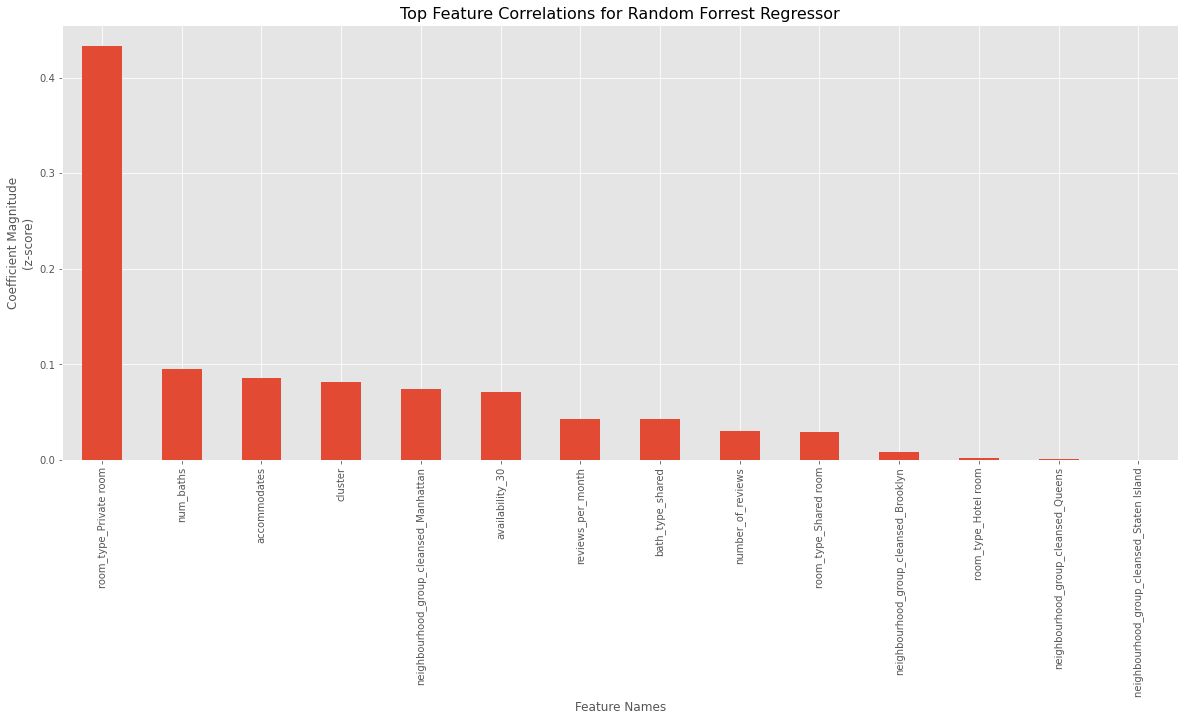

In [45]:
# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

randomForrestReg_wt_plt_df = randomForrestReg_ft_imp_df.head(75)

randomForrestReg_weights = pd.Series(randomForrestReg_wt_plt_df['weights'].values,index=randomForrestReg_wt_plt_df['feature_names'])
ax = randomForrestReg_weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Feature Correlations for Random Forrest Regressor", fontsize=16)
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

# Spectral: nearest neighbors

C:\Users\OaklandHillsMansion\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\OaklandHillsMansion\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\OaklandHillsMansion\Python\Python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\OaklandHillsMansion\Python\Pyt

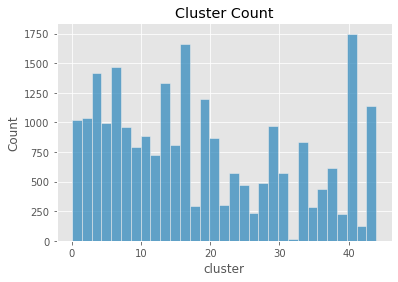

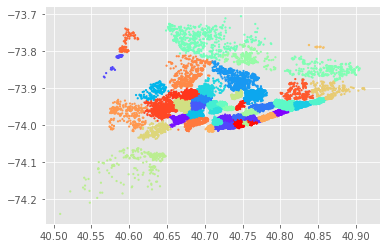

In [46]:
from sklearn.cluster import SpectralClustering

X = LatLong
nclust = 45

spc = SpectralClustering(n_clusters = nclust, affinity = "nearest_neighbors")

# Get and add labels to listings df
label = spc.fit_predict(LatLong)
label_val = spc.fit_predict(LatLong_val)
listings_modeling['cluster'] = label
listings_validation['cluster'] = label_val
sns.histplot(data=listings_modeling, x="cluster").set_title("Cluster Count")
plt.show()

# Scatter plot of labels
plt.scatter(X[:, 0], X[:, 1], c = label, cmap=plt.cm.rainbow, s=5, linewidths=0)
plt.show()


# Standard scale the data

In [47]:
#Standard scale the data
from sklearn.preprocessing import StandardScaler

#Create X and Y for modeling
X_price = listings_modeling.drop(['id','price','price_log','latitude','longitude'],axis=1) #droping rating_max
Y_price_log = listings_modeling['price_log']

#Create new X and Y for validation
X_price_valid = listings_validation.drop(['id','price','price_log','latitude','longitude'],axis=1) #droping rating_max
Y_price_log_valid = listings_validation['price_log']

std = StandardScaler()

std.fit(X_price.values) # only std.fit on train set
X_price_std = std.transform(X_price.values)
X_price_valid_std = std.transform(X_price_valid.values)

#Create dataframe to collect regression models stat
regModel_stat = pd.DataFrame()


rfRandomEstimator = RandomForestRegressor(min_samples_leaf=10, min_samples_split=5, n_estimators=500, n_jobs=8, random_state=0)
rfRandomEstimator.fit(X_price_std, Y_price_log)

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
rf, rfMae = EvaluateRegressionEstimator('Random Forest Regressor', rfRandomEstimator, X_price_std, Y_price_log, X_price_valid_std, Y_price_log_valid, cv_price)
regModel_stat = regModel_stat.append(rf)

#Load the model's coefficient weights and feature names into a dataframe sorted by weights
randomForrestReg_weights = rfRandomEstimator.feature_importances_.ravel()
randomForrestReg_feature_names = X_price_valid.columns.values
randomForrestReg_ft_imp_df = pd.DataFrame({'feature_names':randomForrestReg_feature_names, 'weights':randomForrestReg_weights, 'absolute_weights': np.abs(randomForrestReg_weights)})
randomForrestReg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False)

Parameterization of the best estimator: RandomForestRegressor(min_samples_leaf=10, min_samples_split=5,
                      n_estimators=500, n_jobs=8, random_state=0) 

The average MAE for all cv folds is: 			 0.1288
The average MAE percentage (MAPE) for all cv folds is: 	 6.3077
The average RMSE for all cv folds is: 			 0.17275
The average R2 for all cv folds is: 			 0.66196
---------------------------------------------------------------------
Cross Validation Fold Mean Error Scores
        MAE      MAPE      RMSE        R2
0  0.127452  6.193058  0.172503  0.660497
1  0.132308  6.486963  0.174918  0.655048
2  0.132302  6.500710  0.179005  0.653713
3  0.126409  6.164925  0.166413  0.674960
4  0.124966  6.155798  0.168066  0.676828
5  0.127797  6.248619  0.169752  0.669455
6  0.126649  6.287036  0.167794  0.666508
7  0.129299  6.318649  0.175603  0.654855
8  0.130842  6.371669  0.177790  0.658365
9  0.129988  6.349537  0.175609  0.649355


# Top Feature Correlations for Random Forrest Regressor

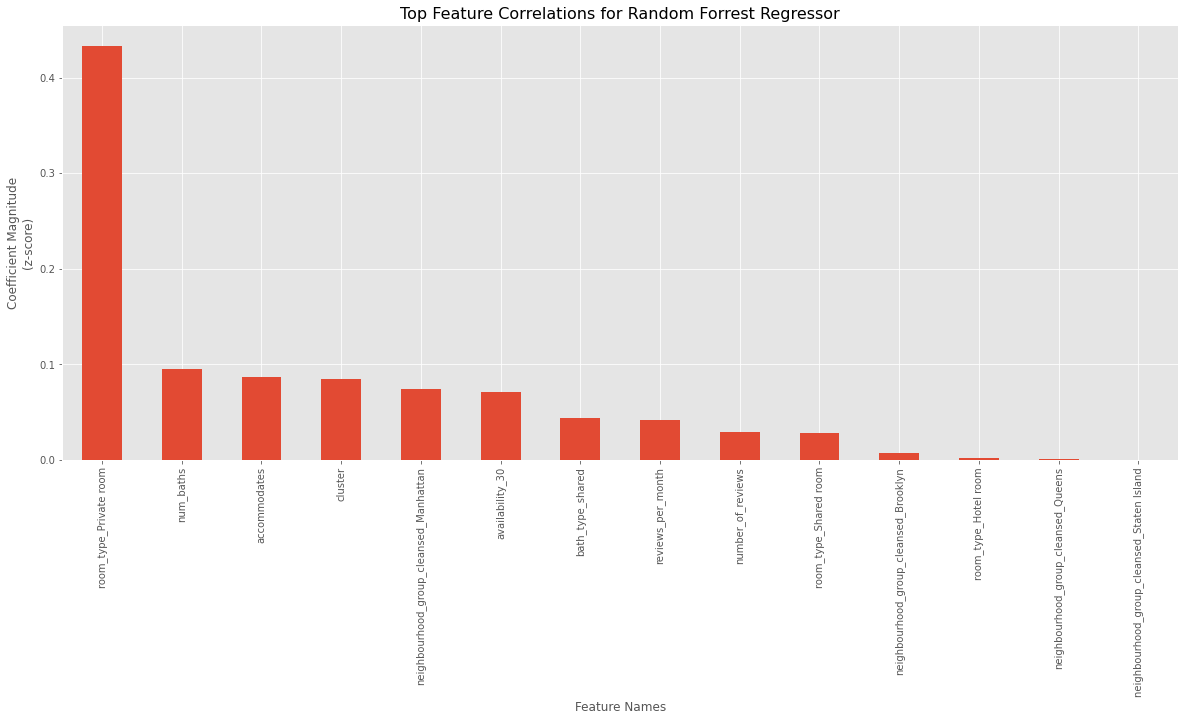

In [48]:
# Examine categorical variables of interest  
#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

randomForrestReg_wt_plt_df = randomForrestReg_ft_imp_df.head(75)

randomForrestReg_weights = pd.Series(randomForrestReg_wt_plt_df['weights'].values,index=randomForrestReg_wt_plt_df['feature_names'])
ax = randomForrestReg_weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Feature Correlations for Random Forrest Regressor", fontsize=16)
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

# Spectral: kneighbors (pre-computed)

C:\Users\OaklandHillsMansion\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
C:\Users\OaklandHillsMansion\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\OaklandHillsMansion\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)
C:\Users\OaklandHillsMansion\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\OaklandHillsM

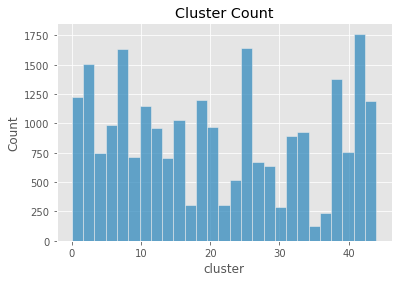

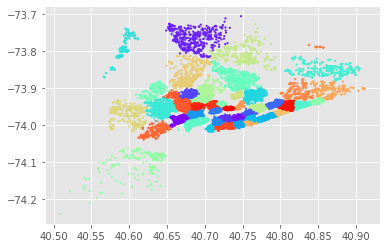

In [49]:
# num clusters
nclust = 45

# Test and validation knn
xknn = kneighbors_graph(LatLong, 10) # additional connectivity information
xknn_val = kneighbors_graph(LatLong_val, 10) # additional connectivity information

# Create and fit model
spc = SpectralClustering(n_clusters = nclust, affinity = "precomputed")
labels = spc.fit_predict(xknn)

# Get and add labels to listings df
label = spc.fit_predict(xknn)
label_val = spc.fit_predict(xknn_val)
listings_modeling['cluster'] = label
listings_validation['cluster'] = label_val
sns.histplot(data=listings_modeling, x="cluster").set_title("Cluster Count")
plt.show()

# Scatter plot of labels
plt.scatter(X[:, 0], X[:, 1], c = label, cmap=plt.cm.rainbow, s=5, linewidths=0)
plt.show()

# Standard scale the data

In [50]:
#Create X and Y for modeling
X_price = listings_modeling.drop(['id','price','price_log','latitude','longitude'],axis=1) #droping rating_max
Y_price_log = listings_modeling['price_log']

#Create new X and Y for validation
X_price_valid = listings_validation.drop(['id','price','price_log','latitude','longitude'],axis=1) #droping rating_max
Y_price_log_valid = listings_validation['price_log']

std = StandardScaler()

std.fit(X_price.values) # only std.fit on train set
X_price_std = std.transform(X_price.values)
X_price_valid_std = std.transform(X_price_valid.values)

#Create dataframe to collect regression models stat
regModel_stat = pd.DataFrame()


rfRandomEstimator = RandomForestRegressor(min_samples_leaf=10, min_samples_split=5, n_estimators=500, n_jobs=8, random_state=0)
rfRandomEstimator.fit(X_price_std, Y_price_log)

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
rf, rfMae = EvaluateRegressionEstimator('Random Forest Regressor', rfRandomEstimator, X_price_std, Y_price_log, X_price_valid_std, Y_price_log_valid, cv_price)
regModel_stat = regModel_stat.append(rf)

#Load the model's coefficient weights and feature names into a dataframe sorted by weights
randomForrestReg_weights = rfRandomEstimator.feature_importances_.ravel()
randomForrestReg_feature_names = X_price_valid.columns.values
randomForrestReg_ft_imp_df = pd.DataFrame({'feature_names':randomForrestReg_feature_names, 'weights':randomForrestReg_weights, 'absolute_weights': np.abs(randomForrestReg_weights)})
randomForrestReg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False)

Parameterization of the best estimator: RandomForestRegressor(min_samples_leaf=10, min_samples_split=5,
                      n_estimators=500, n_jobs=8, random_state=0) 

The average MAE for all cv folds is: 			 0.12941
The average MAE percentage (MAPE) for all cv folds is: 	 6.337
The average RMSE for all cv folds is: 			 0.17344
The average R2 for all cv folds is: 			 0.65922
---------------------------------------------------------------------
Cross Validation Fold Mean Error Scores
        MAE      MAPE      RMSE        R2
0  0.127838  6.208853  0.173252  0.657542
1  0.132991  6.520701  0.175008  0.654694
2  0.132187  6.488487  0.178876  0.654210
3  0.126459  6.164659  0.166325  0.675304
4  0.125962  6.207957  0.169737  0.670369
5  0.127429  6.226842  0.170253  0.667500
6  0.128265  6.361114  0.169304  0.660478
7  0.130050  6.363806  0.176788  0.650182
8  0.130813  6.363803  0.177780  0.658403
9  0.132156  6.463591  0.177076  0.643473


# Top Feature Correlations for Random Forrest Regressor

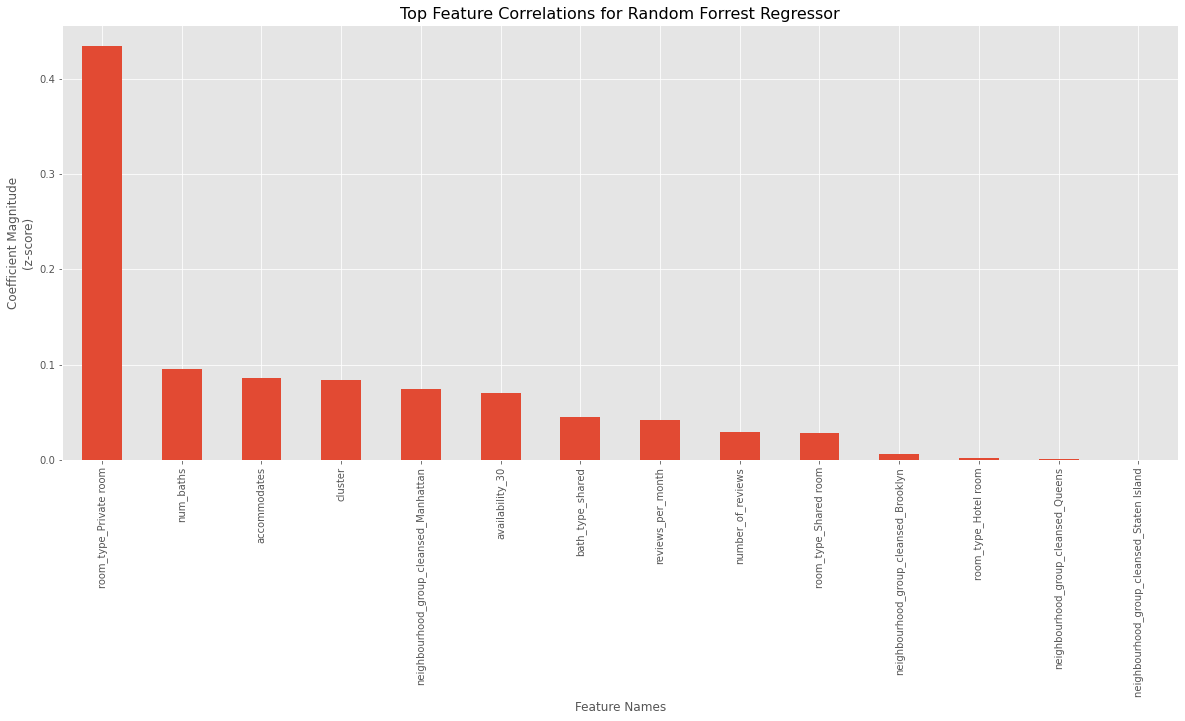

In [51]:
#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

randomForrestReg_wt_plt_df = randomForrestReg_ft_imp_df.head(75)

randomForrestReg_weights = pd.Series(randomForrestReg_wt_plt_df['weights'].values,index=randomForrestReg_wt_plt_df['feature_names'])
ax = randomForrestReg_weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Feature Correlations for Random Forrest Regressor", fontsize=16)
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

# Spectral: custom (pre-computed)

In [52]:
# from sklearn.cluster import SpectralClustering
# from sklearn.metrics import pairwise_distances

# X = LatLong
# nclust = 45

# d = pairwise_distances(X, metric='euclidean')
# d = np.exp(- d**2 / (2*0.1**2)) # making sure euclidean distance does not exceed one

# spc = SpectralClustering(n_clusters = nclust, affinity = "precomputed", eigen_solver ="arpack")
# labels = spc.fit_predict(d)

# plt.scatter(X[:, 0], X[:, 1], c = labels, cmap=plt.cm.rainbow, s=5, linewidths=0)

# plt.show()